In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

Vmax = 0.001 ± 0.000
Km = 14.114 ± 1.050


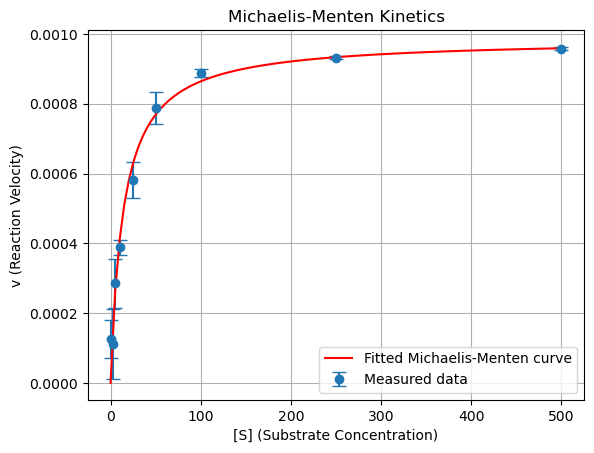

In [14]:
df = pd.read_csv(r'C:\Users\garci\sarai_decal\output.csv')

df['x'] = df['x'].str.replace(' uM', '').astype(float)
df['y'] = df['y'].astype(float)
df['e'] = df['e'].astype(float)

substrate = df['x'].values           
velocity = df['y'].values            
velocity_err = df['e'].values        

def michaelis_menten(S, Vmax, Km):
    return (Vmax * S) / (Km + S)

params, cov = curve_fit(michaelis_menten, substrate, velocity, sigma=velocity_err, absolute_sigma=True)
Vmax, Km = params
perr = np.sqrt(np.diag(cov))  #

print(f"Vmax = {Vmax:.3f} ± {perr[0]:.3f}")
print(f"Km = {Km:.3f} ± {perr[1]:.3f}")

S_fit = np.linspace(min(substrate), max(substrate), 100)
v_fit = michaelis_menten(S_fit, Vmax, Km)

plt.errorbar(substrate, velocity, yerr=velocity_err, fmt='o', capsize=5, label='Measured data')
plt.plot(S_fit, v_fit, color='red', label='Fitted Michaelis-Menten curve')
plt.xlabel('[S] (Substrate Concentration)')
plt.ylabel('v (Reaction Velocity)')
plt.title('Michaelis-Menten Kinetics')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
pd.read_csv(r'C:\Users\garci\Downloads\michaelis_menten_enzymes.csv')

,Enzyme,Km (mM),Vmax (U mg^-1),kcat (min^-1),kcat/Km (mM^-1 min^-1)
0,re-AuFaeA,3.62±0.08,225±2.0,8093±72,2235±72
1,re-AuFaeA^A126C-N152C,5.98±0.12,356±2.0,12805±72,2141±56


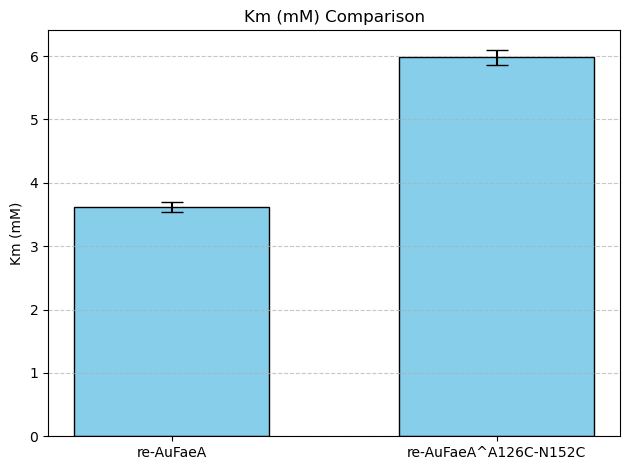

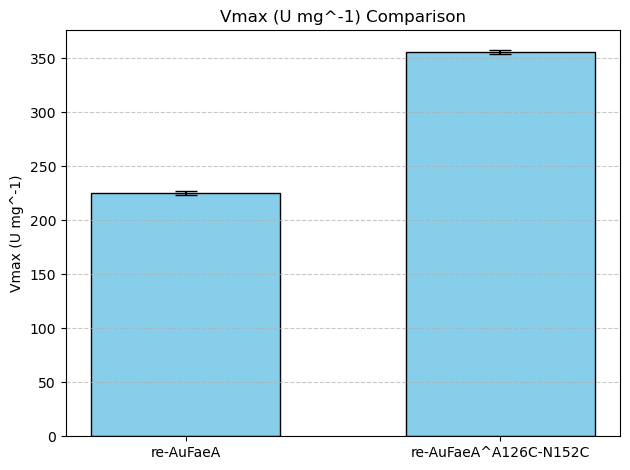

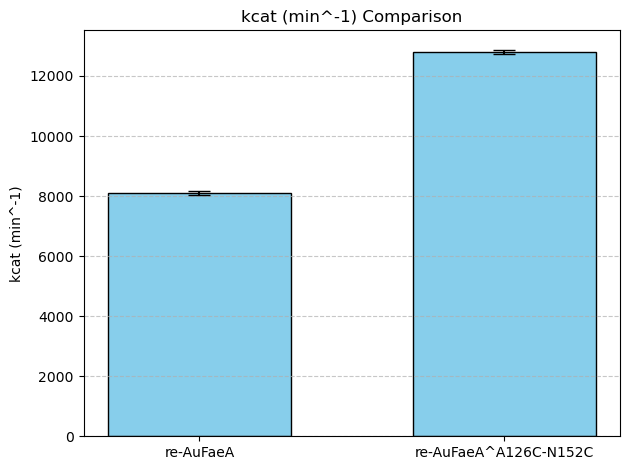

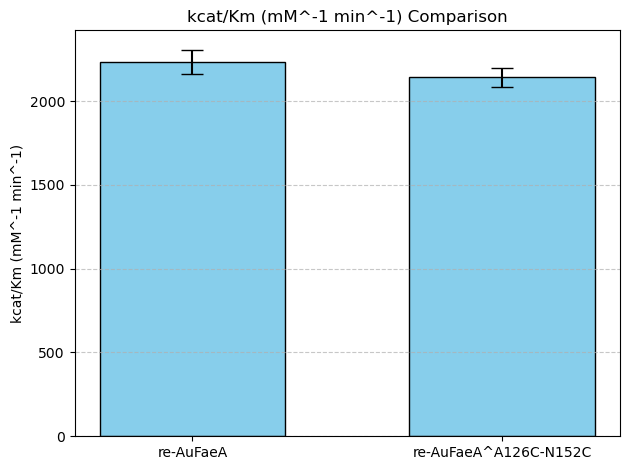

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r'C:\Users\garci\Downloads\michaelis_menten_enzymes.csv')

def split_value_error(s):
    val, err = s.split("±")
    return float(val), float(err)

metrics = ["Km (mM)", "Vmax (U mg^-1)", "kcat (min^-1)", "kcat/Km (mM^-1 min^-1)"]
values = {}
errors = {}

for metric in metrics:
    val_err_pairs = df[metric].apply(split_value_error)
    values[metric] = [ve[0] for ve in val_err_pairs]
    errors[metric] = [ve[1] for ve in val_err_pairs]

x = np.arange(len(df["Enzyme"]))  # 2 enzymes
width = 0.6

for metric in metrics:
    fig, ax = plt.subplots()
    ax.bar(x, values[metric], width, yerr=errors[metric], capsize=8, color='skyblue', edgecolor='black')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(df["Enzyme"])
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
